**Segmentation** subdivides an image into its constituent regions or objects. Segmentation should stop when the objects of interest in an application have been isolated. There is no point in carrying out segmentation past the level of detail required to identify those elements.

Segmentation of nontrivial images is one of the most difficult tasks in image processing. Sometimes you have control over the data acquisition-- the sensors being used to collect the data. That way you can enhance the objects of interest while diminishing the contribution of irrelevant image detail. But other times you don't.

Image segmentation algorithms are generally based on on or two basic properties of intensity values: **discontinuity** and **similarity**. In the first, an image is partitioned based on abrupt changes in intensity, such as edges, in an image. In the second, regions that are similar based on a set of criteria are identified. Methods such as thresholding, region growing, and region splitting and merging fall in this category.

We will try out a few methods from each category. 

# Edge Detection

Visualizing an edge as a discontinuity. In ideal edge, versus an edge in reality.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

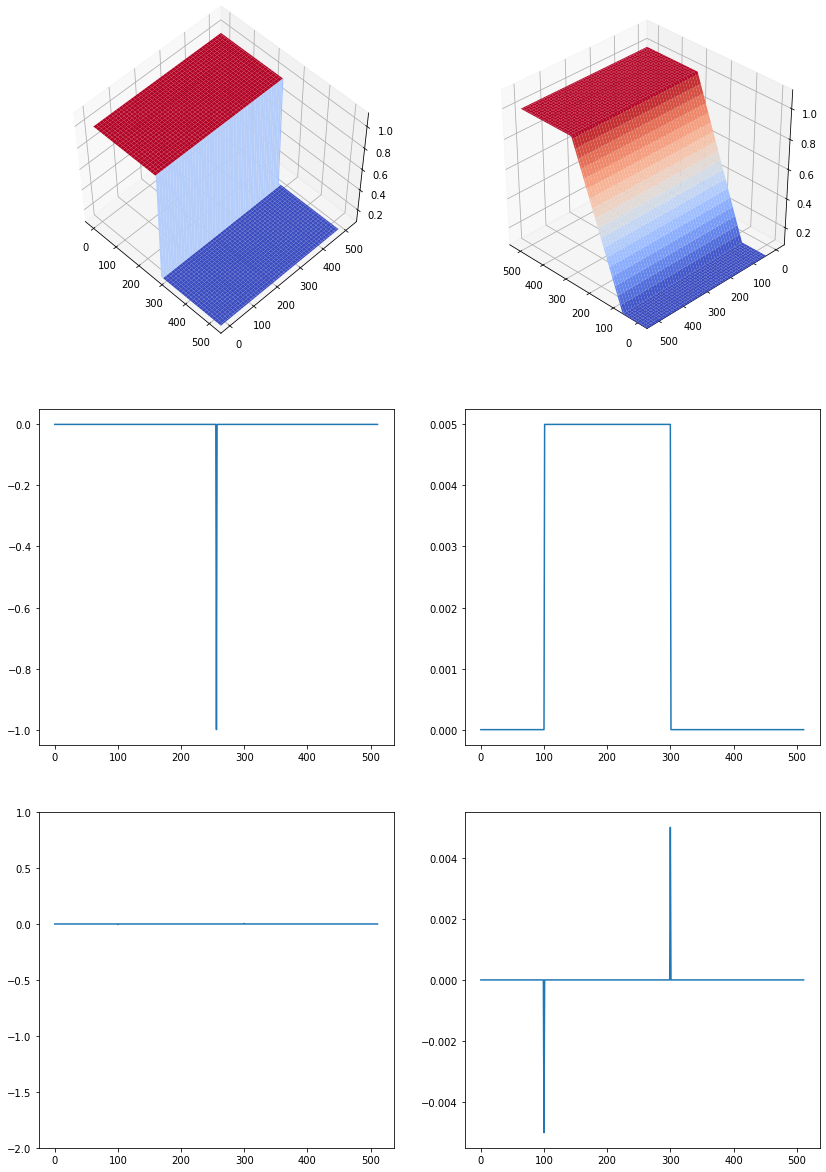

In [57]:
xi = np.linspace(0, 511, 512)
x, y = np.meshgrid(xi, xi)
z = 0*x
z[x < 256] = 1

z1 = 0*x
z1[x>100] = x[x>100]/200 - 0.5
z1[x>300] = 1

dx = 0*xi
dx[1:] = np.diff(z[0, :])
dx1 = 0*xi
dx1[1:] = np.diff(z1[0, :])

d2x = 0*xi
d2x[1:-1] = np.diff(z1[0, 0:-1]) - np.diff(z1[0, 1:])
d2x1 = 0*xi
d2x1[1:-1] = np.diff(z1[0, 0:-1]) - np.diff(z1[0, 1:])

fig = plt.figure(figsize=(14,21))

ax = fig.add_subplot(3,2,1, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
ax.set_zlim([0.1, 1.1])
ax.view_init(55, -45)

ax1 = fig.add_subplot(3,2,2, projection='3d')
ax1.plot_surface(x, y, z1, cmap='coolwarm')
ax1.set_zlim([0.1, 1.1])
ax1.view_init(35, 135)

ax2 = fig.add_subplot(3,2,3)
ax2.plot(xi, dx)
#ax2.set_ylim([-2, 1])

ax3 = fig.add_subplot(3,2,4)
ax3.plot(xi, dx1)
#ax3.set_ylim([-2, 1])

ax2 = fig.add_subplot(3,2,5)
ax2.plot(xi, d2x)
ax2.set_ylim([-2, 1])

ax3 = fig.add_subplot(3,2,6)
ax3.plot(xi, d2x1)
#ax3.set_ylim([-2, 1])

The magnitude of the 1st derivative can be used to detect the presence of an edge. The sign of the 2nd derivative can be used to determine whether an edge pixel lies on the dark or light side of an edge.

Two other features of the 2nd derivative: it produces two values for every edge in an image (an undesirable feature); and (2) an imaginary straight line joining the extreme positive and negative values would cross zero at the midpoint of the edge. This can be useful for locating the centers of thick edges. 

**Exercise**: Can you verify that these results for edges hold true for (1) ramp edges with noise? (2) an edge with a more gradual transition?

## Gradient Operators

First-order derivatives of a digital image are based on the various approximations of the 2D gradient. The gradient on an image f(x,y) is defined as the vector:

$$\nabla f  = \begin{bmatrix}  \frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y} \end{bmatrix}$$

We can make this a single quantity by taking the magnitutde of this vector:

$$mag(\nabla f) = [G_x^2 + G_y^2]^{1/2} $$

There are various ways to implement approximations of the first derivative:
    
**Roberts cross-gradient operators**:

In [8]:
from skimage import data
from scipy.ndimage import convolve
from skimage.util import img_as_float

In [84]:
Gx = np.array([[-1,0],[0,1]])
Gy = np.array([[0,-1],[1,0]])

im = img_as_float(data.camera())
imx = convolve(im, Gx)
imy = convolve(im, Gy)
img = (imx**2 + imy**2)**0.5

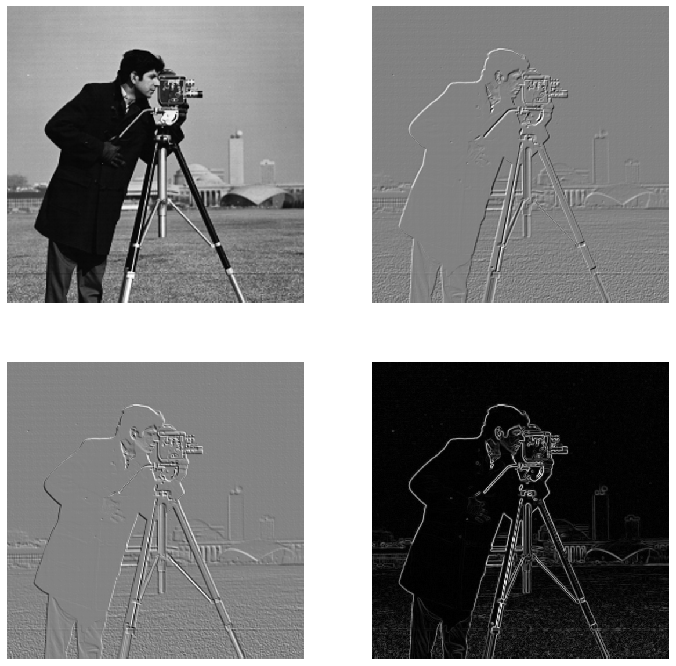

In [85]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(imx, cmap='gray')
axes[2].imshow(imy, cmap='gray')
axes[3].imshow(img, cmap='gray')

This is also built into `skimage`

In [76]:
from skimage.filters import roberts

(-0.5, 511.5, 511.5, -0.5)

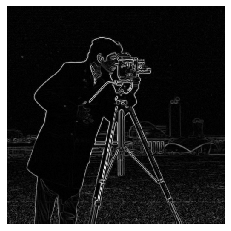

In [78]:
plt.imshow(roberts(im), cmap='gray')
plt.axis('off')

Masks of size 2x2 are awkward to implement, because there is no defined center. So another approach is the **Prewitt filter**:

In [86]:
Gx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
Gy = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

imx = convolve(im, Gx)
imy = convolve(im, Gy)
img = (imx**2 + imy**2)**0.5

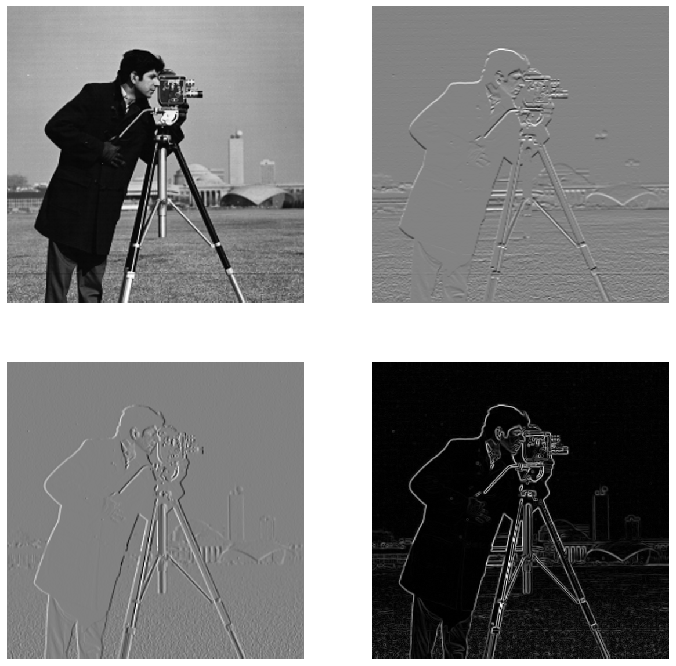

In [87]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(imx, cmap='gray')
axes[2].imshow(imy, cmap='gray')
axes[3].imshow(img, cmap='gray')

Again, also in `skimage`:

(-0.5, 511.5, 511.5, -0.5)

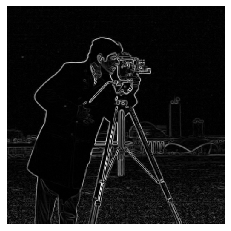

In [81]:
from skimage.filters import prewitt

plt.imshow(prewitt(im), cmap='gray')
plt.axis('off')

Finally, a different implementation uses a coefficient of 2 in the center. This achieves some smoothing by giving more importance to the center point. These are called **Sobel filters**:

In [88]:
Gx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Gy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

imx = convolve(im, Gx)
imy = convolve(im, Gy)
img = (imx**2 + imy**2)**0.5

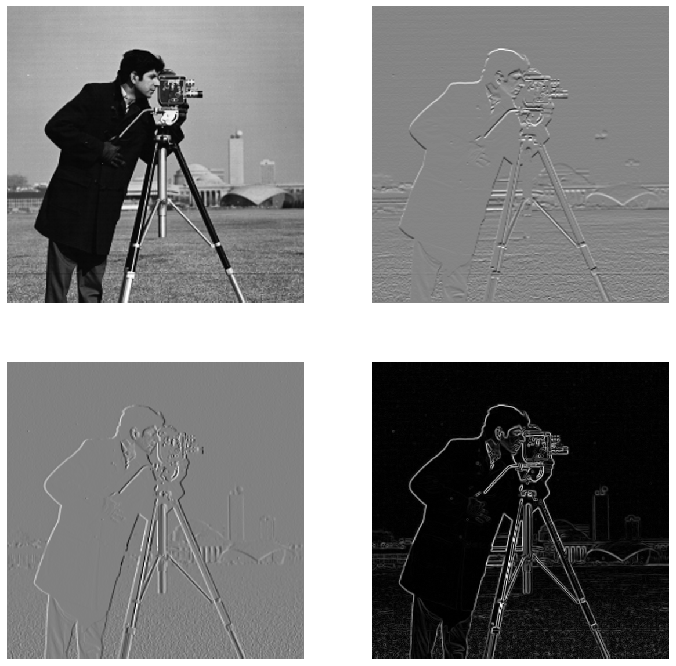

In [89]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(imx, cmap='gray')
axes[2].imshow(imy, cmap='gray')
axes[3].imshow(img, cmap='gray')

Prewitt and Sobel are the most common to use. Prewitt masks are simpler to implement than Sobel masks, but Sobel provides superior noise suppression, an important issues when dealing with gradients.

Since square roots require a lot of computational power, the combined gradient is often calculated using absolute values instead.

## LaPlacian

And, of course, the LaPlacian, a second-order derivative defined as:

$$\nabla ^2 f = \frac{\partial ^2 f}{\partial x^2} + \frac{\partial ^2 f}{\partial y^2} $$

We approximate this with the following:

In [105]:
Gx = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

#lim = convolve(im, Gx)**2
lim = convolve(im, Gx)

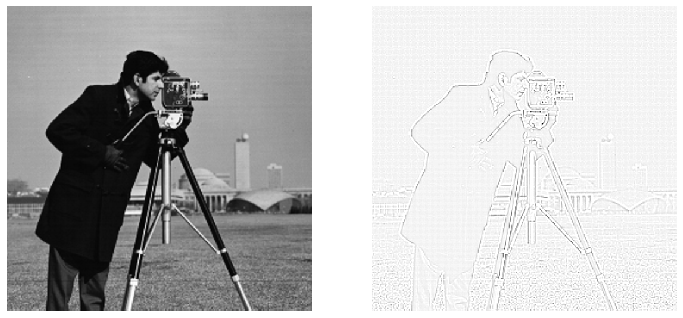

In [106]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
#axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(lim, cmap='gray', vmax=0.1)

The LaPlacian is not used in its original form for edge detection for several reasons. As a 2nd order derivative, the LaPlacian is unacceptably sensitive to noise. Tha magnitude of the LaPlacian produces double edges that complicates segmentation. Finally, the LaPlacian is unable to detect edge direction. The role of the LaPlacian in segmentation consists of (1) using its zero-crossing property for edge location or (2) using it for complementary purposes of establishing whether a pixel is on the dark or light side of an edge.

In case 1, the LaPlacian is combined with a smoothing function as a pre-cursor to finding edges via zero-crossings. Consider the function:

$$h(r) = -e^{-\frac{(x^2 + y^2)}{2\sigma^2}} $$

Convolving this function with an image blurs the image. The **LaPlacian of the Gaussian** 

$$\nabla ^2 h(r) = -\bigg[ \frac{x^2 + y^2 - \sigma^2}{\sigma^4} e^{-\frac{(x^2 + y^2)}{2\sigma^2}} \bigg] $$

Smoothing first reduces the noise before calculating the LaPlacian. 

In [9]:
im = data.coins()
Gx = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])

lim = convolve(im, Gx)

The LaPlacian of Gaussians can be approximated by a difference of Gaussians

In [11]:
from skimage.filters import rank, laplace, gaussian
from skimage.morphology import disk

In [ ]:
filters.gaussian()

In [43]:
mim = gaussian(im, 40)
lim = laplace(im)
lim2 = gaussian(im, sigma=10) - gaussian(im, sigma=9)

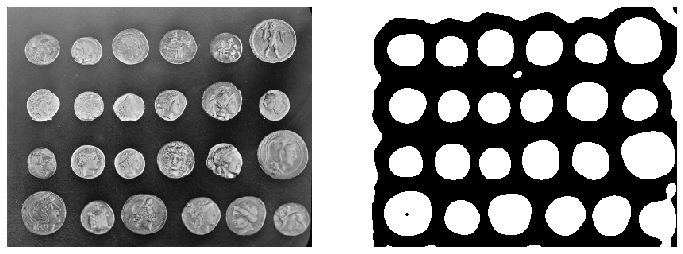

In [56]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
#axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(lim2<0.0008, cmap='gray')

## Edge Linking and Boundary Detection

Ideally, the methods discussed above should yield pixels lying only on edges. Edge detection algorithms typically are followed by linking procedures to assemble edge pixels into meaningful edges.

### Local Processing

One of the simplest approaches for linking edge points is to analyze the characteristics of pixels in a small neighborhood about each point. All points that are similar according to a set of predefined criteria are linked, forming an edge of pixels that meet that criteria.

The two principle properties are (1) the strength of the response of the gradient operator used and (2) the direction of the gradient vector. We won't use this method.
   
## Hough Transform

For line detection

https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html
https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html

## Graph and Minimum Cost Path

https://scikit-image.org/docs/dev/api/skimage.graph.html

# Thresholding

Because of its intuitive properties and simplicity, image tresholding is central to image segmentation:

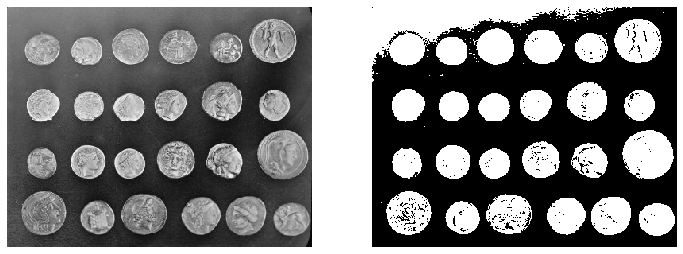

In [68]:
im = data.coins()
im_t = im > 107

fig, axes = plt.subplots(ncols=2, figsize=(12,6))
#axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_t, cmap='gray')

We can already see some problems using thresholding all by itself. Uneven background illumation and dark portions of the coins don't make for easy thresholding. A common problem. Additional issues arise when an analysis requires multiple thresholds (see section on region growing). We can formalize thresholding with the expression:

$$g(x,y) = \begin{cases}
    1,& \text{if } f(x,y) > T\\
    0,              & \text{if } f(x,y) \le T
\end{cases} $$

where T isn't necessarily limited to being a scalar ($T = T[x,y,p(x,y),f(x,y)]$)

when T depends only on f(x,y), the threshold is called **global**. If T depends on f(x,y) and p(x,y), the threshold is called **local**. If T depends on spatial coordinates, the treshold is called **dynamic** or **adaptive**

Sometimes it is difficult to determine what the "best" value of the reshold should be. So far, we have done it manually. There are different algorithms out there for automatic thresholding. We'll try this one with the image above:

1. Set an initial estimate T
2. Segment the image using T. This will produce two groups of pixels: G1 consisting of all pixels with low values and G2 consisting of all pixels with high values.
3. Compute the average gray level values for regions G1 and G2
4. Compute a new threshold $T = \frac{1}{2} (\mu_1 + \mu_2)$
5. Repeat until convergence

In [66]:
T = 100
tol = 100
while tol > 0.1:
    mu1 = np.average(im[im>T])
    mu2 = np.average(im[im<=T])
    mua = 0.5*(mu1+mu2)
    tol = np.abs(T - mua)
    print(tol)
    T = mua

4.293140915512254
1.8177638886662066
0.90889363058659
0.42972002577269564
0.0


There is again a function in skimage that does this for you `skimage.filters.threshold_otsu`

## Adaptive Thresholding

Imaging factors such as uneven illumination prevent global thresholding methods from being effective. One approach to handle this is to divide the original image into sub-images and utilize a different method to threshold each subimage. The key issues are: how to split the image and how to choose the threshold. Each sub-image should be similar in its average intensity to be effective.

We could do this manually, but I will just use the pre-built method in `skimage.filters`, `threshold_adaptive`.

In [70]:
from skimage.filters import threshold_local

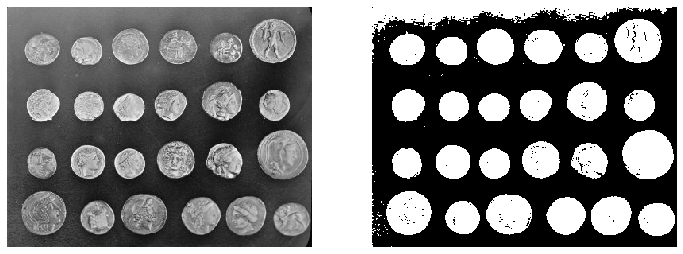

In [77]:
im = data.coins()
im_t = threshold_local(im, block_size=401)

fig, axes = plt.subplots(ncols=2, figsize=(12,6))
#axes = [item for sublist in axes for item in sublist]
for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im>im_t, cmap='gray')